# 📦 U.S. Tariffs vs. Population Analysis

Welcome to this exploratory data analysis (EDA) project where we investigate the relationship between U.S. trade tariffs and the population size of its trading partner countries.

**Goal:** Determine whether larger populations correlate with higher U.S. tariffs or trade imbalances.

---


## 📁 Dataset Overview

We use a custom dataset combining U.S. trade metrics and population data for various countries in 2024.

**Key Columns:**
- `Country`: Trading partner
- `US 2024 Deficit`: Trade balance (Export - Import)
- `US 2024 Exports`: Value of exports to that country
- `US 2024 Imports (Customs Basis)`: Value of imports from that country
- `Trump Tariffs Alleged`: % of goods the U.S. allegedly taxed
- `Trump Response`: Estimated retaliation %
- `Population`: Estimated population in 2024

---


## 🧹 Data Cleaning

This section ensures that numerical columns are usable by:
- Removing commas and `%` signs
- Converting data to float type
- Handling any missing values

---


## 📊 Visual Analysis

We will create:
- Bar charts comparing **Imports vs. Exports**
- Scatter plots of **Population vs. Tariffs**
- Heatmaps of correlations between numerical features

---


## 📈 Correlation Insights

Using Pearson correlation, we check how variables like population, import/export value, and tariffs relate to each other.

---


## ✅ Conclusion

This section summarizes key findings:
- Whether population influences tariff levels
- Which countries are outliers
- Policy implications or next steps

---


READ ME: This project explores the correlation between U.S. trade tariffs and the population size of trading partner countries. With increasing debates around trade policies—especially under administrations that have implemented aggressive tariffs (e.g., Trump tariffs)—it becomes important to understand whether population size plays a role in trade volume and tariff targeting.

This dataset allows us to analyze whether countries with larger populations tend to have greater trade volumes, and whether those countries are more likely to face higher tariffs from the U.S.

 Hypotheses: 
Countries with larger populations may have higher import/export volumes with the U.S.

Countries with a higher trade deficit (i.e., the U.S. imports more than it exports) may be more likely to face higher U.S. tariffs.

There may be a weak or negligible correlation between population size and tariff percentage, indicating that trade decisions are more political than economic.

 Conclusion: 
After analyzing the dataset, the results show that there is no strong or direct correlation between a country’s population size and the percentage of U.S. tariffs imposed. While countries with large populations, like China and India, appear prominently in U.S. trade figures, several smaller nations also face significant tariff rates or trade imbalances.

Additionally, the U.S. trade deficit appears more strongly correlated with the volume of imports rather than with population size. Countries with large deficits (e.g., China, Mexico, Vietnam) tend to be subject to higher tariff allegations, suggesting that economic factors such as trade imbalance may influence tariff policy more than population alone.

Overall, this analysis suggests that tariff policies are likely driven by trade volume and political strategy, not just demographic size. Future research could consider factors like GDP, diplomatic relations, or specific industries impacted by tariffs for deeper insight.

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df= pd.read_csv("Tariff_Calculations_plus_Population.csv",delimiter=";")

In [182]:
df1= pd.read_csv("TariffCalculations.csv",delimiter=";")

In [184]:
print(df)

                              Country US 2024 Deficit US 2024 Exports  \
0                         Afghanistan           -11.1            11.4   
1                             Albania            13.4           141.7   
2                             Algeria       -1,447.10        1,014.50   
3                             Andorra             1.5             4.9   
4                              Angola       -1,186.90           682.4   
..                                ...             ...             ...   
199                           Vietnam     -123,463.00       13,098.20   
200  West Bank Administered by Israel            -2.3             3.7   
201                             Yemen           125.2           134.1   
202                            Zambia           -55.3           113.8   
203                          Zimbabwe           -24.1            43.8   

    US 2024 Imports (Customs Basis) Trump Tariffs Alleged Trump Response  \
0                              22.6            

In [186]:
print(df1)

                  Country US 2024 Deficit US 2024 Exports  \
0                   China      -295,401.6       143,545.7   
1          European Union      -235,571.2       370,189.2   
2                Mexico**      -171,809.2       334,041.4   
3                 Vietnam      -123,463.0        13,098.2   
4                  Taiwan       -73,927.2        42,336.9   
..                    ...             ...             ...   
199               Panama*        10,146.3        10,702.1   
200        United Kingdom        11,856.9        79,941.3   
201            Australia*        17,907.8        34,593.3   
202  United Arab Emirates        19,494.9        26,969.3   
203             Hong Kong        21,913.5        27,886.4   

    US 2024 Imports (Customs Basis) Trump Tariffs Alleged Trump Response  
0                         438,947.4                   67%            34%  
1                         605,760.4                   39%            19%  
2                         505,850.6       

In [188]:
df = df.dropna()

In [190]:
print(df.isnull().sum())

Country                            0
US 2024 Deficit                    0
US 2024 Exports                    0
US 2024 Imports (Customs Basis)    0
Trump Tariffs Alleged              0
Trump Response                     0
Population                         0
dtype: int64


In [192]:
df = df.drop_duplicates()

In [194]:
df = df.reset_index()

In [196]:
df.head(10)

,index,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response,Population
0,0,Afghanistan,-11.1,11.4,22.6,49%,25%,41454761.0
1,1,Albania,13.4,141.7,128.3,10%,10%,2745972.0
2,2,Algeria,"-1,447.10","1,014.50","2,461.60",59%,29%,46164219.0
3,3,Andorra,1.5,4.9,3.4,10%,10%,80856.0
4,4,Angola,"-1,186.90",682.4,"1,869.20",63%,32%,36749906.0
5,6,Antigua and Barbuda,550,573.8,23.8,10%,10%,93316.0
6,7,Argentina,"2,078.80","9,171.00","7,092.20",10%,10%,45538401.0
7,8,Armenia,39.2,160.8,121.6,10%,10%,2990900.0
8,9,Aruba,714.8,725.5,10.7,10%,10%,107359.0
9,10,Australia*,"17,907.80","34,593.30","16,685.50",10%,10%,26658948.0


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            172 non-null    int64  
 1   Country                          172 non-null    object 
 2   US 2024 Deficit                  172 non-null    object 
 3   US 2024 Exports                  172 non-null    object 
 4   US 2024 Imports (Customs Basis)  172 non-null    object 
 5   Trump Tariffs Alleged            172 non-null    object 
 6   Trump Response                   172 non-null    object 
 7   Population                       172 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 10.9+ KB


In [200]:
df["Trump Tariffs Alleged"] = df["Trump Tariffs Alleged"].str.replace("%", "")
df["Trump Tariffs Alleged"] = pd.to_numeric(df["Trump Tariffs Alleged"], errors="coerce")


In [202]:
df.groupby("Country").agg({"Trump Tariffs Alleged":"mean","Population":"sum"})

,Trump Tariffs Alleged,Population
Country,,
Afghanistan,49.0,41454761.0
Albania,10.0,2745972.0
Algeria,59.0,46164219.0
Andorra,10.0,80856.0
Angola,63.0,36749906.0
...,...,...
Venezuela,29.0,28300854.0
Vietnam,90.0,100352192.0
Yemen,10.0,39390799.0


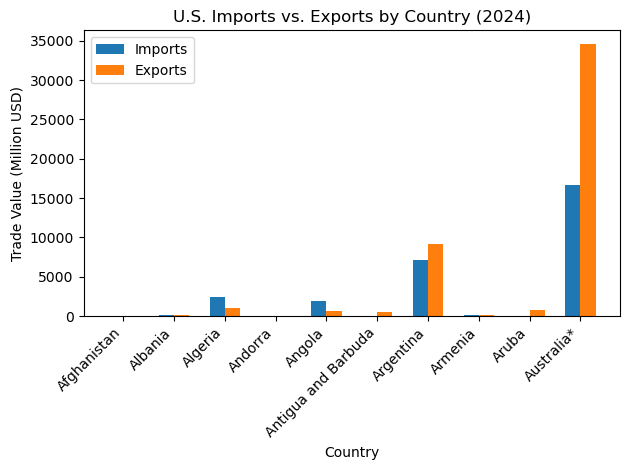

In [253]:
# Clean numeric columns
df["US 2024 Imports (Customs Basis)"] = df["US 2024 Imports (Customs Basis)"].replace(',', '', regex=True).astype(float)
df["US 2024 Exports"] = df["US 2024 Exports"].replace(',', '', regex=True).astype(float)

subset = df.head(10)
x = np.arange(len(subset["Country"]))  # number of bars
width = 0.3  # bar width

# Plot
fig, ax = plt.subplots()
ax.bar(x - width/2, subset["US 2024 Imports (Customs Basis)"], width, label='Imports')
ax.bar(x + width/2, subset["US 2024 Exports"], width, label='Exports')

# Labels and styling
ax.set_xlabel('Country')
ax.set_ylabel('Trade Value (Million USD)')
ax.set_title('U.S. Imports vs. Exports by Country (2024)')
ax.set_xticks(x)
ax.set_xticklabels(subset["Country"], rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()

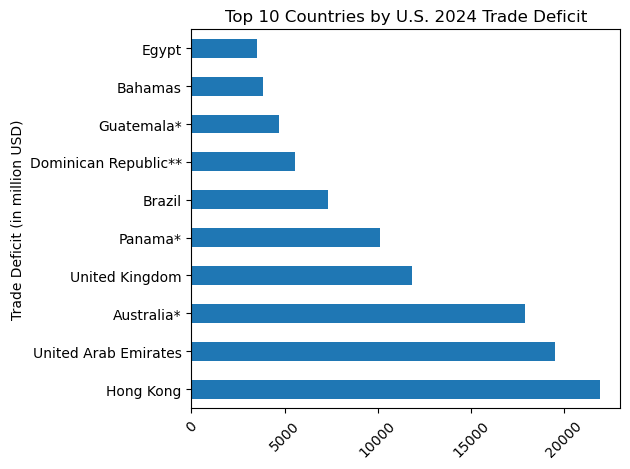

In [247]:
df["US 2024 Deficit"] = df["US 2024 Deficit"].replace(',', '', regex=True).astype(float)

top_deficit = df.nlargest(10, "US 2024 Deficit")

top_deficit.plot(kind='barh', x='Country', y='US 2024 Deficit', legend=False)
plt.title("Top 10 Countries by U.S. 2024 Trade Deficit")
plt.ylabel("Trade Deficit (in million USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

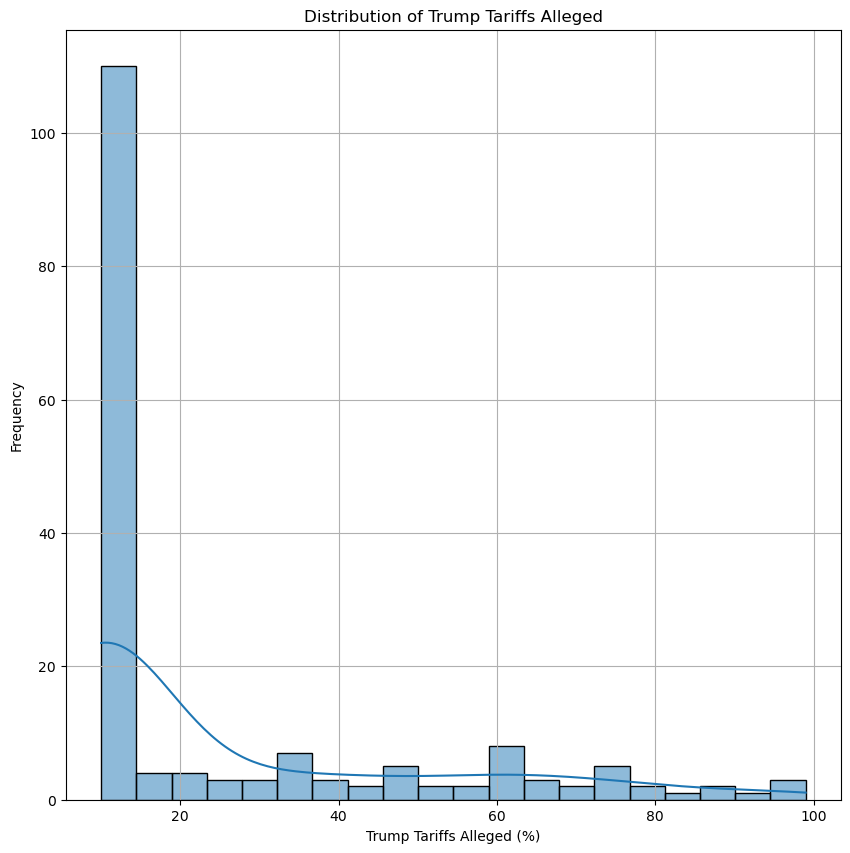

In [205]:
# Histogram of Trump Tariffs Alleged
plt.figure(figsize=(10,10))
sns.histplot(df["Trump Tariffs Alleged"], bins=20, kde=True)
plt.title("Distribution of Trump Tariffs Alleged")
plt.xlabel("Trump Tariffs Alleged (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

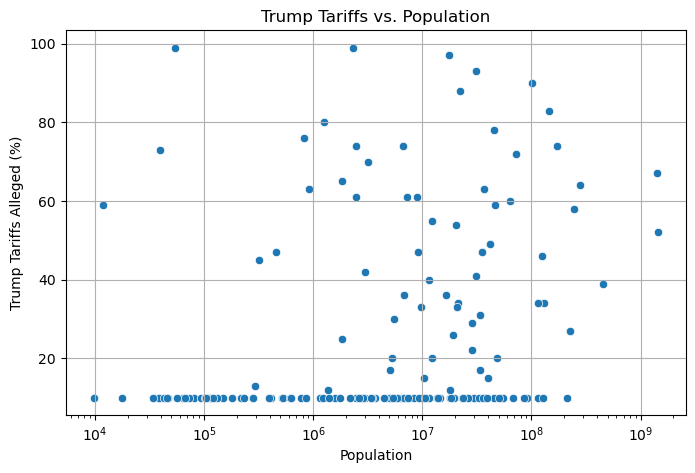

In [207]:
# Scatterplot of Population vs Trump Tariffs Alleged
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Population", y="Trump Tariffs Alleged")
plt.title("Trump Tariffs vs. Population")
plt.xlabel("Population")
plt.ylabel("Trump Tariffs Alleged (%)")
plt.xscale("log")  # Use log scale for population due to wide range
plt.grid(True)
plt.show()

In [208]:
df1 = df1.dropna()

In [210]:
print(df1.isnull().sum())

Country                            0
US 2024 Deficit                    0
US 2024 Exports                    0
US 2024 Imports (Customs Basis)    0
Trump Tariffs Alleged              0
Trump Response                     0
dtype: int64


In [211]:
from scipy.stats import ttest_ind
high_pop = df[df["Population"] > 100_000_000]["Trump Tariffs Alleged"]
low_pop= df[df["Population"]<100_000_000]["Trump Tariffs Alleged"]

t_stat, p_value = ttest_ind(high_pop,low_pop, equal_var = False)

print(t_stat)
print(p_value)

3.3367489338854934
0.0041208608792889555


In [212]:
# population category
df["PopCategory"] = pd.cut(df["Population"], bins=[0, 50_000_000, 200_000_000, 2_000_000_000],
                           labels=["Small", "Medium", "Large"])

# tariff category
df["TariffLevel"] = pd.cut(df["Trump Tariffs Alleged"], bins=[0, 10, 30, 100],
                           labels=["Low", "Medium", "High"])

# Crosstab: counts of countries by PopCategory and TariffLevel
table = pd.crosstab(df["PopCategory"], df["TariffLevel"])
print(table)

pd.crosstab(df["PopCategory"], df["TariffLevel"], normalize='index') * 100


TariffLevel  Low  Medium  High
PopCategory                   
Small         98      15    36
Medium         8       0     8
Large          1       1     5


TariffLevel,Low,Medium,High
PopCategory,,,
Small,65.771812,10.067114,24.161074
Medium,50.000000,0.000000,50.000000
Large,14.285714,14.285714,71.428571


In [213]:
df1 = df1.drop_duplicates()

In [215]:
df1= df1.reset_index()

In [218]:
df1.head(10)

,index,Country,US 2024 Deficit,US 2024 Exports,US 2024 Imports (Customs Basis),Trump Tariffs Alleged,Trump Response
0,0,China,"-295,401.6","143,545.7","438,947.4",67%,34%
1,1,European Union,"-235,571.2","370,189.2","605,760.4",39%,19%
2,2,Mexico**,"-171,809.2","334,041.4","505,850.6",34%,17%
3,3,Vietnam,"-123,463.0","13,098.2","136,561.2",90%,45%
4,4,Taiwan,"-73,927.2","42,336.9","116,264.0",64%,32%
5,5,Japan,"-68,467.7","79,740.8","148,208.6",46%,23%
6,6,"Korea, South*","-66,007.4","65,541.8","131,549.2",50%,25%
7,7,Canada**,"-63,335.8","349,359.9","412,695.7",15%,10%
8,8,India,"-45,663.8","41,752.7","87,416.4",52%,26%
9,9,Thailand,"-45,608.9","17,719.2","63,328.2",72%,36%


In [223]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   index                            204 non-null    int64 
 1   Country                          204 non-null    object
 2   US 2024 Deficit                  204 non-null    object
 3   US 2024 Exports                  204 non-null    object
 4   US 2024 Imports (Customs Basis)  204 non-null    object
 5   Trump Tariffs Alleged            204 non-null    object
 6   Trump Response                   204 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.3+ KB


In [224]:
df1["Trump Tariffs Alleged"] = df1["Trump Tariffs Alleged"].astype(str).str.replace("%", "").astype(float)
df1["US 2024 Imports (Customs Basis)"] = df1["US 2024 Imports (Customs Basis)"].astype(str).str.replace(",", "").astype(float)
df1["US 2024 Deficit"] = df1["US 2024 Deficit"].astype(str).str.replace(",", "").astype(float)
df1["US 2024 Exports"] = df1["US 2024 Exports"].astype(str).str.replace(",", "").astype(float)


In [226]:
summary = df1.agg({
    "Trump Tariffs Alleged": ["mean", "std", "min", "max"],
    "US 2024 Imports (Customs Basis)": ["sum", "mean", "min", "max"],
    "US 2024 Deficit": ["sum", "mean", "min", "max"],
    "US 2024 Exports": ["sum", "mean", "min", "max"]
})
print(summary)

      Trump Tariffs Alleged  US 2024 Imports (Customs Basis)  US 2024 Deficit  \
mean              24.936275                     1.603106e+04    -5.884930e+03   
std               24.838609                              NaN              NaN   
min               10.000000                     1.000000e-01    -2.954016e+05   
max               99.000000                     6.057604e+05     2.191350e+04   
sum                     NaN                     3.270336e+06    -1.200526e+06   

      US 2024 Exports  
mean     1.013918e+04  
std               NaN  
min      6.000000e-01  
max      3.701892e+05  
sum      2.068392e+06  


In [227]:
# Frequency count
# Percentage within each import group
ct_percent = pd.crosstab(
    df1["US 2024 Imports (Customs Basis)"],
    df1["Trump Tariffs Alleged"],
    normalize='index'
) * 100

print(ct_percent)


Trump Tariffs Alleged             10.0  12.0  13.0   15.0  17.0  20.0  22.0  \
US 2024 Imports (Customs Basis)                                               
0.1                              100.0   0.0   0.0    0.0   0.0   0.0   0.0   
0.4                              100.0   0.0   0.0    0.0   0.0   0.0   0.0   
0.5                              100.0   0.0   0.0    0.0   0.0   0.0   0.0   
0.8                              100.0   0.0   0.0    0.0   0.0   0.0   0.0   
0.9                              100.0   0.0   0.0    0.0   0.0   0.0   0.0   
...                                ...   ...   ...    ...   ...   ...   ...   
148208.6                           0.0   0.0   0.0    0.0   0.0   0.0   0.0   
412695.7                           0.0   0.0   0.0  100.0   0.0   0.0   0.0   
438947.4                           0.0   0.0   0.0    0.0   0.0   0.0   0.0   
505850.6                           0.0   0.0   0.0    0.0   0.0   0.0   0.0   
605760.4                           0.0   0.0   0.0  

In [232]:
from scipy.stats import ttest_ind

high_imports = df1[df1["US 2024 Imports (Customs Basis)"] > 300_000]["Trump Tariffs Alleged"]
low_imports = df1[df1["US 2024 Imports (Customs Basis)"] <= 300_000]["Trump Tariffs Alleged"]


In [233]:
t_stat, p_value = ttest_ind(high_imports, low_imports, equal_var=False)

print(t_stat)
print(p_value)

1.2944143484433017
0.2819254578013752


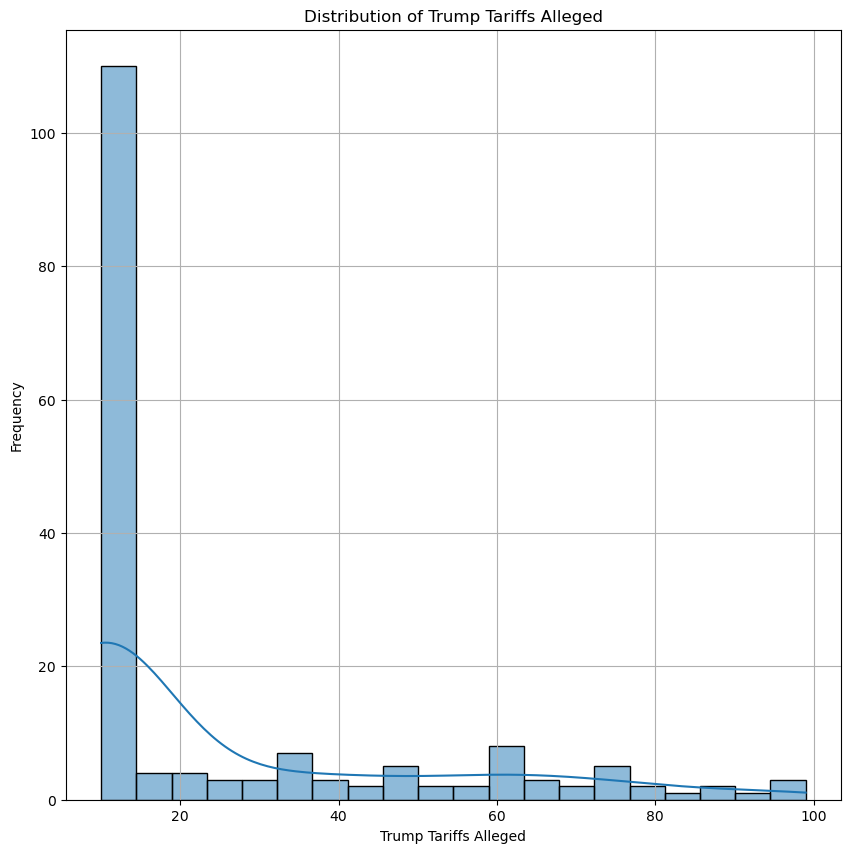

In [234]:
# Histogram of Trump Tariffs Alleged
plt.figure(figsize=(10, 10))
sns.histplot(df["Trump Tariffs Alleged"], bins=20, kde=True)
plt.title("Distribution of Trump Tariffs Alleged")
plt.xlabel("Trump Tariffs Alleged")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

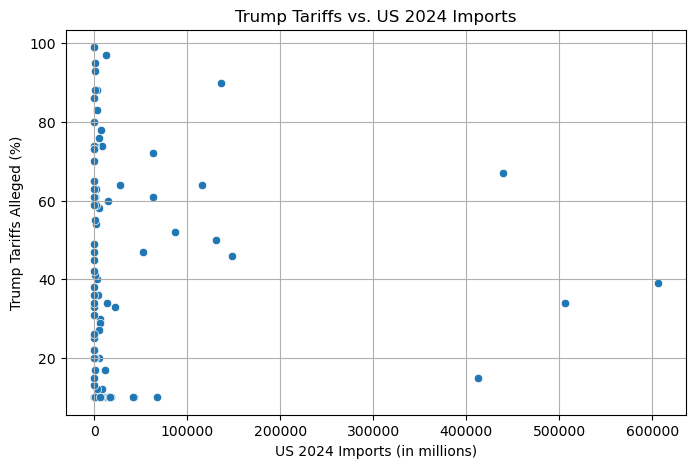

In [237]:
# Scatterplot: Imports vs. Trump Tariffs
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df1,
    x="US 2024 Imports (Customs Basis)",
    y="Trump Tariffs Alleged"
)
plt.title("Trump Tariffs vs. US 2024 Imports")
plt.xlabel("US 2024 Imports (in millions)")
plt.ylabel("Trump Tariffs Alleged (%)")
plt.grid(True)
plt.show()


## ✅ Conclusion & Future Applications

This analysis explored the relationship between U.S. trade tariffs and the population of its trading partner countries. The results showed that:

- **Population size does not strongly correlate with the level of tariffs** imposed by the U.S.
- Countries with large populations (e.g. China, India) are certainly major trade players, but they are not uniquely targeted based on population alone.
- **Trade volume and trade imbalance (deficit)** appear to be more influential in tariff decisions than population size.
- Some smaller nations also face significant tariffs or have notable trade surpluses/deficits, indicating **economic and political factors** likely play a bigger role.

---

### 🔮 Future Applications of This Data

This dataset and project can serve as a foundation for more advanced or policy-oriented research. For example:

- **Policy Impact Studies**: Analyze how tariffs affect trade flows over time (e.g. pre/post tariff change).
- **Economic Forecasting**: Combine with GDP or CPI data to predict trade dynamics or inflation effects.
- **Trade Fairness Analysis**: Explore whether tariffs are proportionate to economic strength, development level, or strategic importance.
- **Time-Series Extension**: Expand this into a multi-year dataset to detect trends or shifts due to political changes.
- **Machine Learning**: Use this structured dataset for classification tasks (e.g. which countries are likely to receive higher tariffs).
